In [3]:
import os
import numpy as np
import pandas as pd
import sklearn.neighbors
import sklearn.tree
from sklearn.metrics import *
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from random import seed
from random import randrange

from statistics import mean
import pdb
 
os.chdir("C:\\Users\\Keshav Gambhir\\Desktop\\fashion-mnist\\utils")
print(os.getcwd())
import mnist_reader

C:\Users\Keshav Gambhir\Desktop\fashion-mnist\utils


# Class for a Naive bayes Classifier
## 1 --> Trousers
## 2 --> Pullovers

In [24]:
class NaiveBayes:
  def __init__(self,x_train,y_train):
    self.x_train = x_train
    self.y_train = y_train
    self.mean_of_1 = 0
    self.mean_of_2 = 0
    self.variance_of_1 = 1e-6
    self.variance_of_2 = 1e-6

  # seperating trousers from pullovers
  def seperate_entites(self):
    self.index_of_1 = []
    self.index_of_2 = []
    i = 0
    while(i<len(self.y_train)):
      if(self.y_train[i] == 1):
        self.index_of_1.append(i)
      if(self.y_train[i] == 2):
        self.index_of_2.append(i)
      i+=1

  # Calculation of mean and variance
  def mean_variance(self):
    self.mean_of_1 = np.mean((self.x_train[self.index_of_1]),axis = 0)
    self.mean_of_2 = np.mean((self.x_train[self.index_of_2]),axis = 0)
    self.variance_of_1 = np.var((self.x_train[self.index_of_1]),axis = 0) + (1e-6)
    self.variance_of_2 = np.var((self.x_train[self.index_of_2]),axis = 0) + (1e-6)
  
  # Gaussian function for trousers
  def gaussian_function_one(self,input):
    exp_term = ((input-self.mean_of_1)**2/(2*self.variance_of_1))
    prob = (1/(2*math.pi*self.variance_of_1)**0.5) * np.exp(-exp_term)
    return np.sum(np.log(prob+1e-6))
  
  # Gaussian function for pullovers
  def gaussian_function_two(self,input):
    exp_term = ((input-self.mean_of_2)**2/(2*self.variance_of_2))
    prob = (1/(2*math.pi*self.variance_of_2)**0.5) * np.exp(-exp_term)
    return np.sum(np.log(prob+1e-6))
  
  # Predict function
  def predict(self,x_test):
    output = []
    tmpLst = []
    for val in x_test:
      prob_trouser = self.gaussian_function_one(val)
      prob_pullover = self.gaussian_function_two(val)
      tmpLst.append((prob_trouser,prob_pullover))
      if(prob_trouser > prob_pullover):
        
        output.append(1)
      else:
        output.append(2)
    return output,tmpLst


In [5]:
# Evaluation matrix using sklearn functions
def evaluate(y_test_actual,y_test_predicted):
  print("CONFUSION MATRIX:")
  print()
  print(metrics.confusion_matrix(y_test_actual,y_test_predicted))
  print()
  print()
  print()
  fpr, tpr, threshold = metrics.roc_curve(y_test_actual, y_test_predicted,pos_label=2)
  roc_auc = metrics.auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  print()
  print()
  accuracy = metrics.accuracy_score(y_test_actual,y_test_predicted)
  precision = metrics.precision_score(y_test_actual,y_test_predicted)
  recall = metrics.recall_score(y_test_actual,y_test_predicted)
  print("Accuracy: "+str(accuracy))
  print("Precision: "+str(precision))
  print("Recall: "+str(recall))

In [6]:
# Reading the dataset and spliting into test and train format
def readDataset():
  x_train, y_train = mnist_reader.load_mnist('../data/fashion', kind='train')
  x_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')
  return x_train,y_train ,x_test,y_test

(12000, 784)
CONFUSION MATRIX:

[[966  34]
 [ 48 952]]





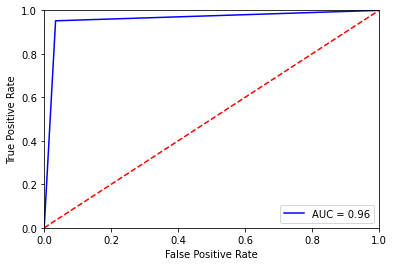



Accuracy: 0.959
Precision: 0.9526627218934911
Recall: 0.966


In [27]:
# Extracting only trousers and pullovers from the dataset
def transformData():
  x_train,y_train,x_test,y_test = readDataset()
  train_data_index = []
  test_data_index = []
  
  i = 0
  while(i < len(y_train)):
    if(y_train[i] == 1) or (y_train[i] == 2):
      train_data_index.append(i)
    i += 1
  
  j = 0
  while(j < len(y_test)):
    if (y_test[j] == 1) or (y_test[j] == 2):
      test_data_index.append(j)
    j += 1
  
  x_train,y_train = x_train[train_data_index],y_train[train_data_index]
  x_test,y_test = x_test[test_data_index],y_test[test_data_index]
  
  # Normalizing the data
  x_train = np.array(list(map(lambda x: x/255,x_train)))
  x_test = np.array(list(map(lambda x: x/255,x_test)))
  print(x_train.shape)
  x_train = np.squeeze(x_train)
  x_train_tmp,x_test_tmp,y_train_tmp,y_test_tmp = train_test_split(x_train,y_train,test_size = 0.20, random_state = 0)
  

  return x_train_tmp,y_train_tmp,x_test_tmp,y_test_tmp,x_test,y_test

# Main Function
def main():
  x_train_tmp,y_train_tmp,x_test_tmp,y_test_tmp,x_test,y_test = transformData()
  NB = NaiveBayes(x_train_tmp,y_train_tmp)
  NB.seperate_entites()
  NB.mean_variance()
  output, tmpLst = NB.predict(x_test)
  evaluate(y_test,output)

main()

In [5]:
def evaluateMatrixResult(y_test_actual,y_test_predicted):
  fpr, tpr, threshold = metrics.roc_curve(y_test_actual, y_test_predicted,pos_label=2)
  roc_auc = metrics.auc(fpr, tpr)
  accuracy = metrics.accuracy_score(y_test_actual,y_test_predicted)
  precision = metrics.precision_score(y_test_actual,y_test_predicted)
  recall = metrics.recall_score(y_test_actual,y_test_predicted)
  return fpr,tpr,threshold,roc_auc,accuracy,precision,recall

CONFUSION MATRIX:

[[126   3]
 [  3 108]]





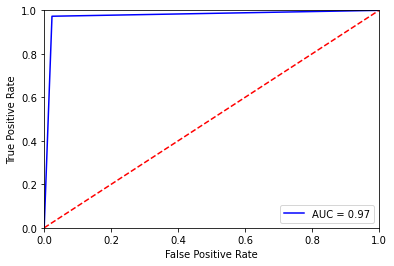



Accuracy: 0.975
Precision: 0.9767441860465116
Recall: 0.9767441860465116



CONFUSION MATRIX:

[[119   3]
 [ 12 106]]





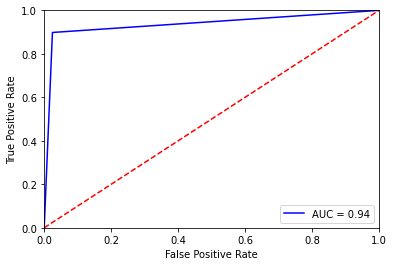



Accuracy: 0.9375
Precision: 0.9083969465648855
Recall: 0.9754098360655737



CONFUSION MATRIX:

[[126   3]
 [  6 105]]





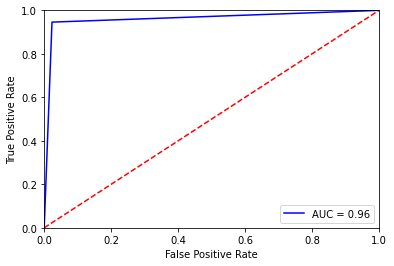



Accuracy: 0.9625
Precision: 0.9545454545454546
Recall: 0.9767441860465116



CONFUSION MATRIX:

[[114   4]
 [  3 119]]





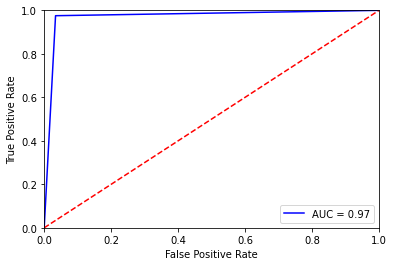



Accuracy: 0.9708333333333333
Precision: 0.9743589743589743
Recall: 0.9661016949152542



CONFUSION MATRIX:

[[115   6]
 [  3 116]]





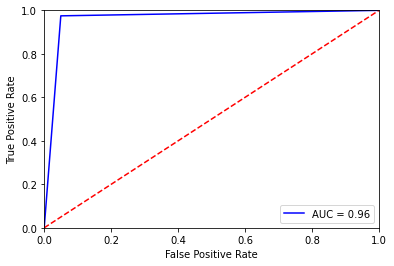



Accuracy: 0.9625
Precision: 0.9745762711864406
Recall: 0.9504132231404959



CONFUSION MATRIX:

[[115   5]
 [  9 111]]





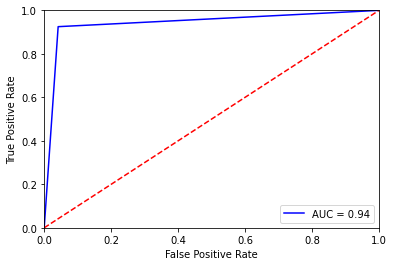



Accuracy: 0.9416666666666667
Precision: 0.9274193548387096
Recall: 0.9583333333333334



CONFUSION MATRIX:

[[122   5]
 [  6 107]]





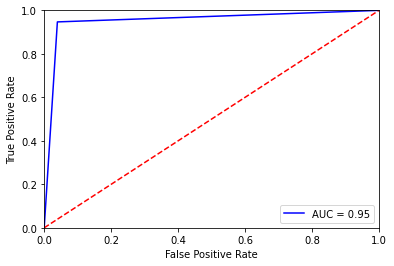



Accuracy: 0.9541666666666667
Precision: 0.953125
Recall: 0.9606299212598425



CONFUSION MATRIX:

[[105   4]
 [  1 130]]





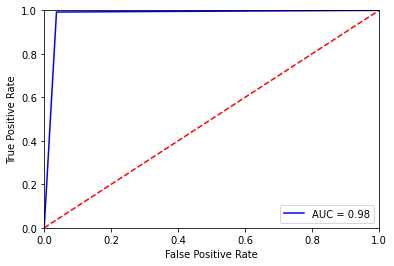



Accuracy: 0.9791666666666666
Precision: 0.9905660377358491
Recall: 0.963302752293578



CONFUSION MATRIX:

[[112   4]
 [  5 119]]





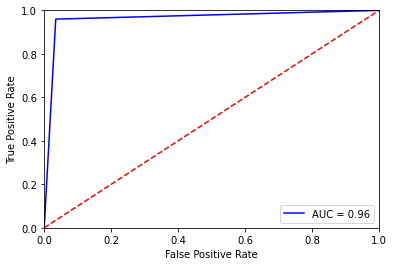



Accuracy: 0.9625
Precision: 0.9572649572649573
Recall: 0.9655172413793104



CONFUSION MATRIX:

[[115   5]
 [  4 116]]





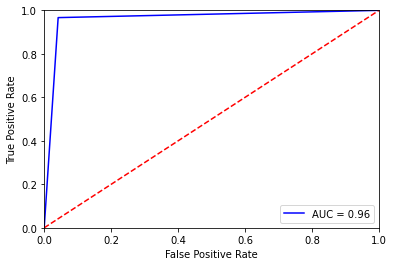



Accuracy: 0.9625
Precision: 0.9663865546218487
Recall: 0.9583333333333334



CONFUSION MATRIX:

[[127   2]
 [  3 108]]





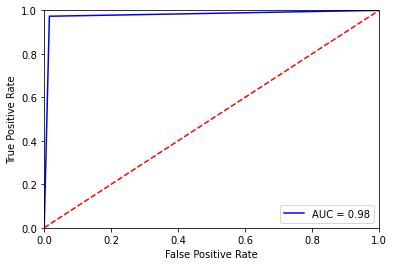



Accuracy: 0.9791666666666666
Precision: 0.9769230769230769
Recall: 0.9844961240310077



CONFUSION MATRIX:

[[123   4]
 [  7 106]]





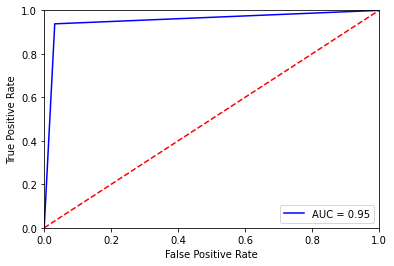



Accuracy: 0.9541666666666667
Precision: 0.9461538461538461
Recall: 0.968503937007874



CONFUSION MATRIX:

[[119   4]
 [  5 112]]





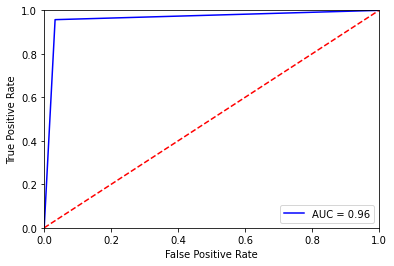



Accuracy: 0.9625
Precision: 0.9596774193548387
Recall: 0.967479674796748



CONFUSION MATRIX:

[[117   3]
 [  8 112]]





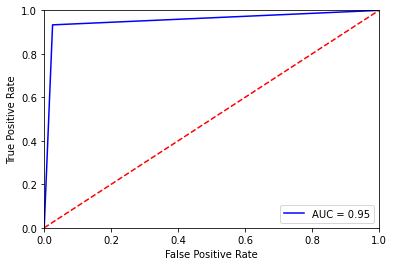



Accuracy: 0.9541666666666667
Precision: 0.936
Recall: 0.975



CONFUSION MATRIX:

[[105   1]
 [  7 127]]





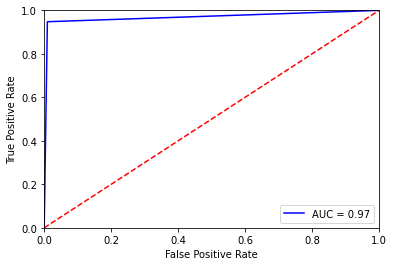



Accuracy: 0.9666666666666667
Precision: 0.9375
Recall: 0.9905660377358491



CONFUSION MATRIX:

[[119   2]
 [  3 116]]





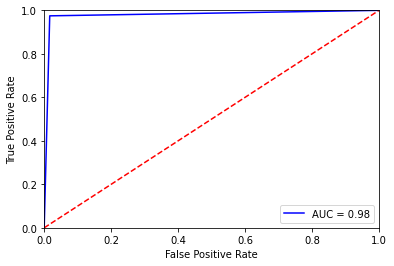



Accuracy: 0.9791666666666666
Precision: 0.9754098360655737
Recall: 0.9834710743801653



CONFUSION MATRIX:

[[121   5]
 [  6 108]]





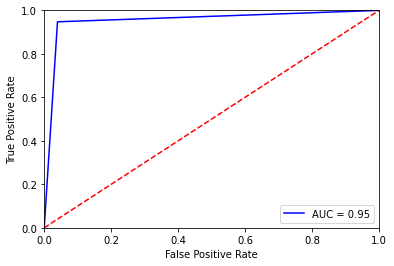



Accuracy: 0.9541666666666667
Precision: 0.952755905511811
Recall: 0.9603174603174603



CONFUSION MATRIX:

[[116   5]
 [  2 117]]





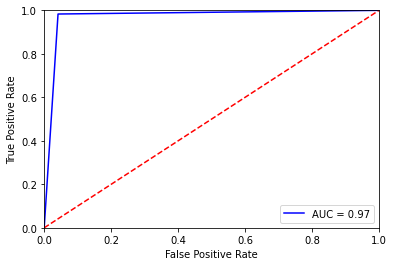



Accuracy: 0.9708333333333333
Precision: 0.9830508474576272
Recall: 0.9586776859504132



CONFUSION MATRIX:

[[107   3]
 [  7 123]]





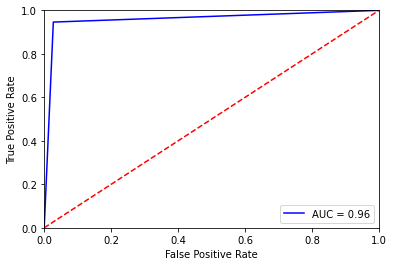



Accuracy: 0.9583333333333334
Precision: 0.9385964912280702
Recall: 0.9727272727272728



CONFUSION MATRIX:

[[121   1]
 [  6 112]]





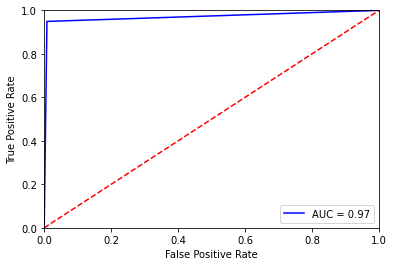



Accuracy: 0.9708333333333333
Precision: 0.952755905511811
Recall: 0.9918032786885246



CONFUSION MATRIX:

[[118   5]
 [ 10 107]]





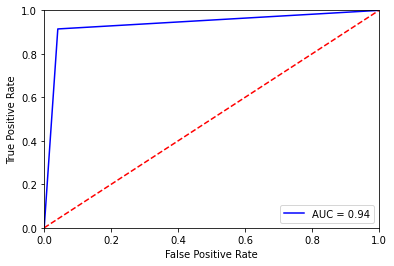



Accuracy: 0.9375
Precision: 0.921875
Recall: 0.959349593495935



CONFUSION MATRIX:

[[115   6]
 [  3 116]]





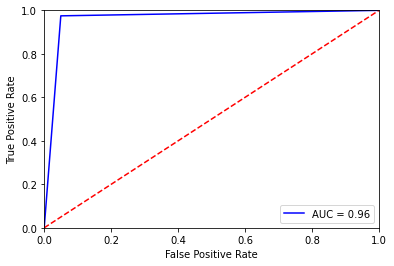



Accuracy: 0.9625
Precision: 0.9745762711864406
Recall: 0.9504132231404959



CONFUSION MATRIX:

[[129   2]
 [  8 101]]





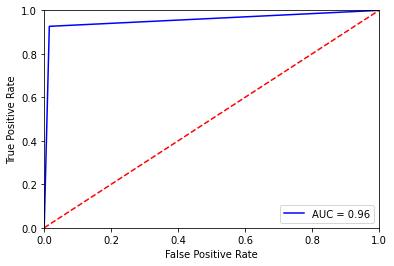



Accuracy: 0.9583333333333334
Precision: 0.9416058394160584
Recall: 0.9847328244274809



CONFUSION MATRIX:

[[111   6]
 [ 11 112]]





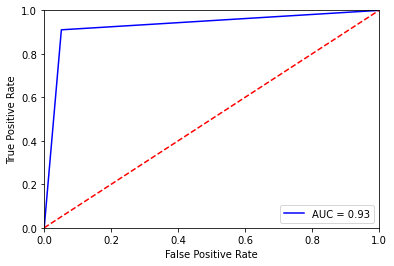



Accuracy: 0.9291666666666667
Precision: 0.9098360655737705
Recall: 0.9487179487179487



CONFUSION MATRIX:

[[101   4]
 [  7 128]]





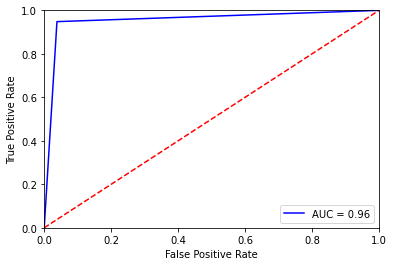



Accuracy: 0.9541666666666667
Precision: 0.9351851851851852
Recall: 0.9619047619047619



CONFUSION MATRIX:

[[125   1]
 [  4 110]]





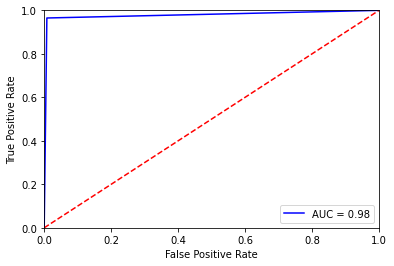



Accuracy: 0.9791666666666666
Precision: 0.9689922480620154
Recall: 0.9920634920634921



CONFUSION MATRIX:

[[113   4]
 [  7 116]]





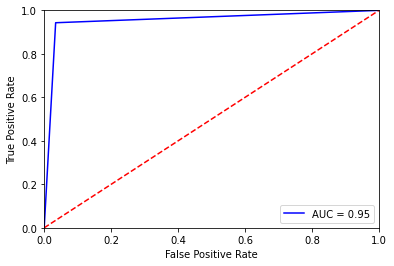



Accuracy: 0.9541666666666667
Precision: 0.9416666666666667
Recall: 0.9658119658119658



CONFUSION MATRIX:

[[123   7]
 [  7 103]]





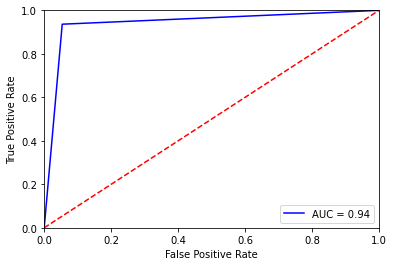



Accuracy: 0.9416666666666667
Precision: 0.9461538461538461
Recall: 0.9461538461538461



CONFUSION MATRIX:

[[116   5]
 [  6 113]]





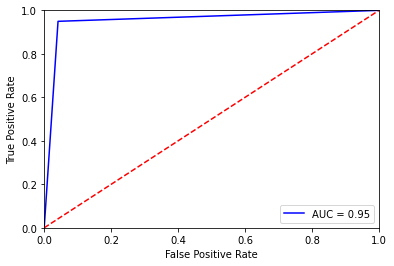



Accuracy: 0.9541666666666667
Precision: 0.9508196721311475
Recall: 0.9586776859504132



CONFUSION MATRIX:

[[109   3]
 [  8 120]]





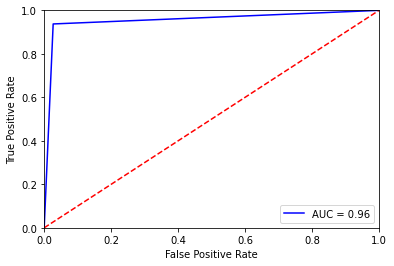



Accuracy: 0.9541666666666667
Precision: 0.9316239316239316
Recall: 0.9732142857142857



CONFUSION MATRIX:

[[117   5]
 [  5 113]]





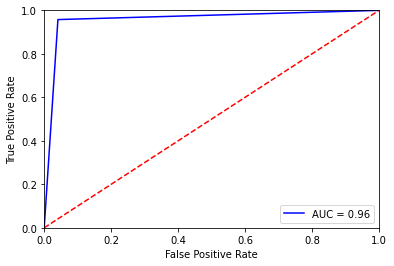



Accuracy: 0.9583333333333334
Precision: 0.9590163934426229
Recall: 0.9590163934426229



CONFUSION MATRIX:

[[121   2]
 [  4 113]]





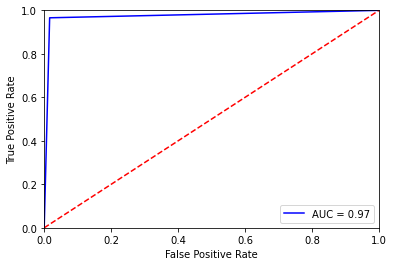



Accuracy: 0.975
Precision: 0.968
Recall: 0.983739837398374



CONFUSION MATRIX:

[[126   1]
 [  4 109]]





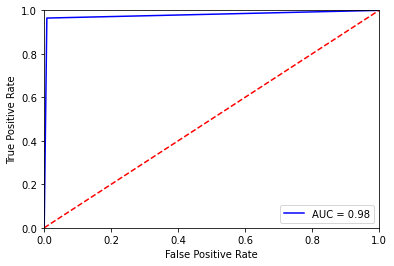



Accuracy: 0.9791666666666666
Precision: 0.9692307692307692
Recall: 0.9921259842519685



CONFUSION MATRIX:

[[121   1]
 [  3 115]]





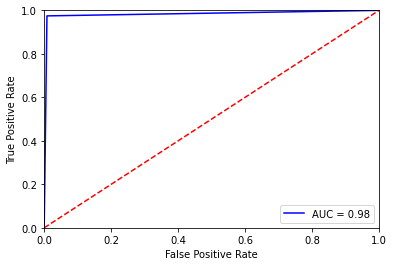



Accuracy: 0.9833333333333333
Precision: 0.9758064516129032
Recall: 0.9918032786885246



CONFUSION MATRIX:

[[118   2]
 [ 10 110]]





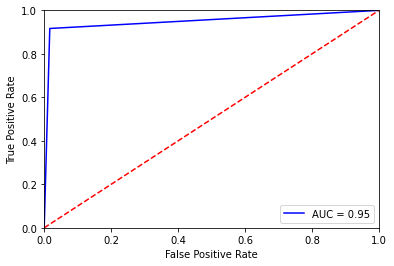



Accuracy: 0.95
Precision: 0.921875
Recall: 0.9833333333333333



CONFUSION MATRIX:

[[116   5]
 [  8 111]]





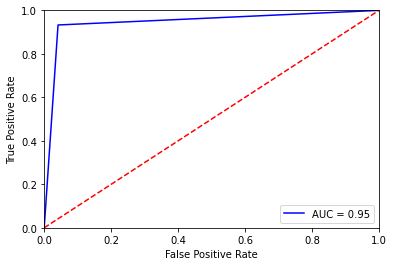



Accuracy: 0.9458333333333333
Precision: 0.9354838709677419
Recall: 0.9586776859504132



CONFUSION MATRIX:

[[115   4]
 [  7 114]]





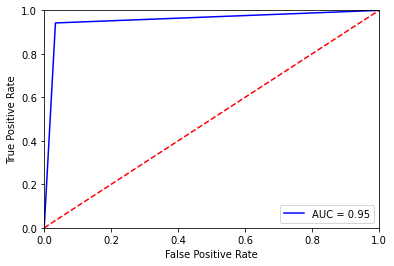



Accuracy: 0.9541666666666667
Precision: 0.9426229508196722
Recall: 0.9663865546218487



CONFUSION MATRIX:

[[106   2]
 [ 11 121]]





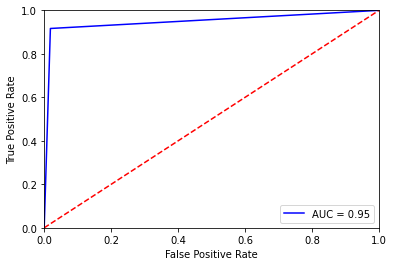



Accuracy: 0.9458333333333333
Precision: 0.905982905982906
Recall: 0.9814814814814815



CONFUSION MATRIX:

[[110   3]
 [  7 120]]





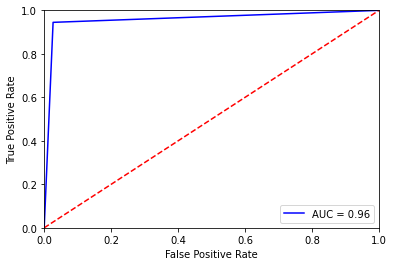



Accuracy: 0.9583333333333334
Precision: 0.9401709401709402
Recall: 0.9734513274336283



CONFUSION MATRIX:

[[117   1]
 [  5 117]]





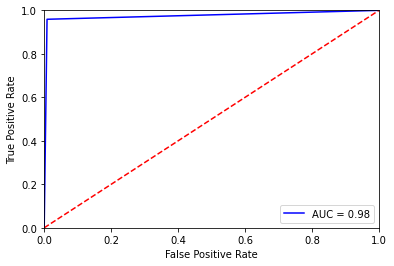



Accuracy: 0.975
Precision: 0.9590163934426229
Recall: 0.9915254237288136



CONFUSION MATRIX:

[[118   1]
 [  6 115]]





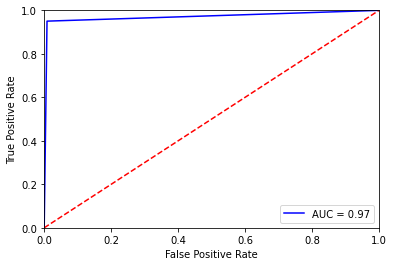



Accuracy: 0.9708333333333333
Precision: 0.9516129032258065
Recall: 0.9915966386554622



CONFUSION MATRIX:

[[112   2]
 [  5 121]]





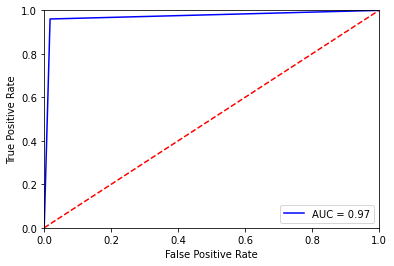



Accuracy: 0.9708333333333333
Precision: 0.9572649572649573
Recall: 0.9824561403508771



CONFUSION MATRIX:

[[120   2]
 [ 10 108]]





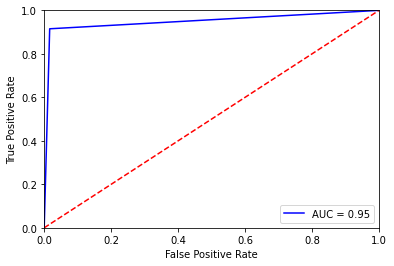



Accuracy: 0.95
Precision: 0.9230769230769231
Recall: 0.9836065573770492



CONFUSION MATRIX:

[[112   3]
 [  6 119]]





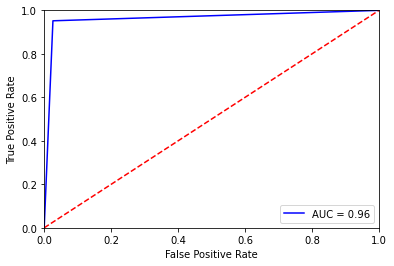



Accuracy: 0.9625
Precision: 0.9491525423728814
Recall: 0.9739130434782609



CONFUSION MATRIX:

[[128   0]
 [  6 106]]





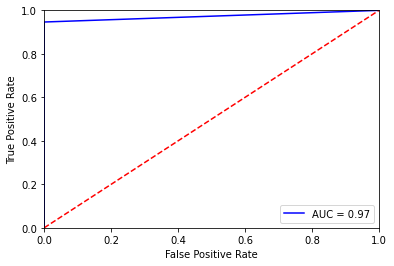



Accuracy: 0.975
Precision: 0.9552238805970149
Recall: 1.0



CONFUSION MATRIX:

[[105   4]
 [  5 126]]





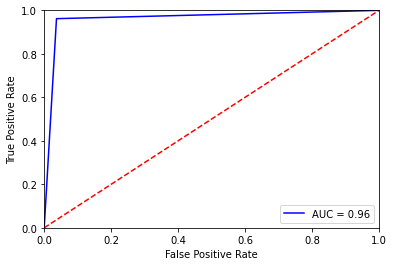



Accuracy: 0.9625
Precision: 0.9545454545454546
Recall: 0.963302752293578



CONFUSION MATRIX:

[[112   3]
 [  3 122]]





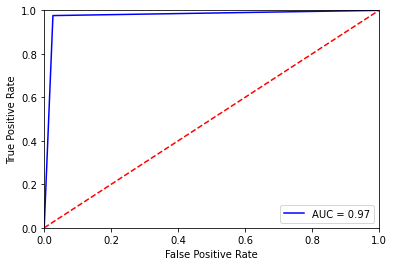



Accuracy: 0.975
Precision: 0.9739130434782609
Recall: 0.9739130434782609



CONFUSION MATRIX:

[[128   4]
 [  7 101]]





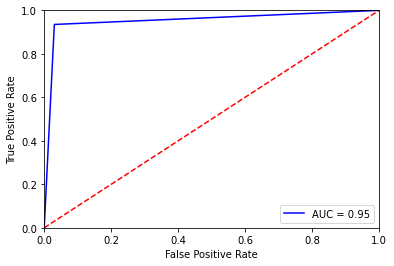



Accuracy: 0.9541666666666667
Precision: 0.9481481481481482
Recall: 0.9696969696969697



CONFUSION MATRIX:

[[114   5]
 [  2 119]]





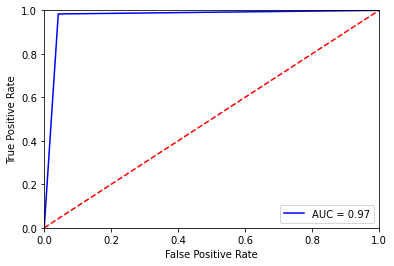



Accuracy: 0.9708333333333333
Precision: 0.9827586206896551
Recall: 0.957983193277311



CONFUSION MATRIX:

[[113   2]
 [  4 121]]





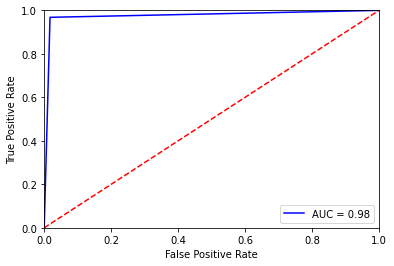



Accuracy: 0.975
Precision: 0.9658119658119658
Recall: 0.9826086956521739





In [40]:
fpr = []
tpr = []
threshold = []
roc_auc = []
accuracy = []
precision = []
recall = []

def kFoldCrossValidation(folds):
  x_train,y_train,x_test,y_test = readDataset()
  train_data_index = []
  test_data_index = []
  i = 0
  while(i < len(y_train)):
    if(y_train[i] == 1) or (y_train[i] == 2):
      train_data_index.append(i)
    i += 1
  
  j = 0
  while(j < len(y_test)):
    if (y_test[j] == 1) or (y_test[j] == 2):
      test_data_index.append(j)
    j += 1
  
  x_train,y_train = x_train[train_data_index],y_train[train_data_index]
  x_test,y_test = x_test[test_data_index],y_test[test_data_index]
  
  x_train = np.array(list(map(lambda x: x/255,x_train)))
  x_test = np.array(list(map(lambda x: x/255,x_test)))
  y_train = y_train.reshape(-1,1)
  
  combined_dataset = np.append(x_train,y_train,axis=1)
  dataset_split = []

  combined_dataset_list = list(combined_dataset)
  foldSize = int(len(combined_dataset)/folds)
  s = 0
  e = foldSize

  i = 0
  while(i < folds):
    test_set_list = []
    training_set_list = []
    
    j = 0
    while(j < s):
      training_set_list.append(combined_dataset_list[j])
      j+=1
    k = e
    while(k < len(combined_dataset_list)):
      training_set_list.append(combined_dataset_list[k])
      k+=1
    l = s
    while(l < e):
      test_set_list.append(combined_dataset_list[l])
      l+=1


    training_set_x, training_set_y = np.array(training_set_list)[:,:-1], np.array(training_set_list)[:,-1]
    test_set_x, test_set_y = np.array(test_set_list)[:,:-1],np.array(test_set_list)[:,-1]
    training_set_y = np.array(list(map(lambda x: int(x),training_set_y)))
    test_set_y = np.array(list(map(lambda x: int(x),test_set_y)))
    
    model = NaiveBayes(training_set_x,training_set_y)
    model.seperate_entites()
    model.mean_variance()
    predicted_output, tmpLst = model.predict(test_set_x)
    a,b,c,d,e,f,g = evaluate(test_set_y,predicted_output)
    fpr.append(a)
    tpr.append(b)
    threshold.append(c)
    roc_auc.append(d)
    accuracy.append(e)
    precision.append(f)
    recall.append(g)
    print()
    print()
    print()
    s = s+foldSize
    e = e + foldSize
    i+=1
  print()
  print()
  print()

def kFoldMain():
  kFoldCrossValidation(5)
  avg_accuracy = mean(accuracy)
  avg_precision = mean(precision)
  avg_recall = mean(recall)
  avg_fpr = mean(fpr)
  avg_tpr = mean(tpr)
  avg_threshold = mean(threshold)
  print("AVERAGE ACCURACY: :"+ str(accuracy))
  print("AVERAGE PRECISION: "+str(precision))
  print("AVERAGE RECALL: "+str(recall))